Ví dụ minh họa việc sử dụng phân cụm (clustering ) để thực hiện phân đoạn hình ảnh (image segmentation). Sử dụng thuật toán k-means.


In [2]:
# Sinh viên có thể dùng module cv2 hoặc các module khác để xử lý file ảnh
# Để dùng cv2, nếu chưa cài đặt OpenCV, các em cần cài đặt opencv-python
# Có thể cần update pip, gõ lệnh: python.exe -m pip install --upgrade pip
# Cài đặt OpenCV thông qua pip, gõ lệnh: pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load file hình ảnh (ví dụ: file ảnh 'lenna.png' chứa cùng chung trong thư mục)
image = cv2.imread('lenna.png')
# Chuyển tử BGR (OpenCV) sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Định dạng ảnh thành một mảng 2D chứa các pixel (width * height, 3)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


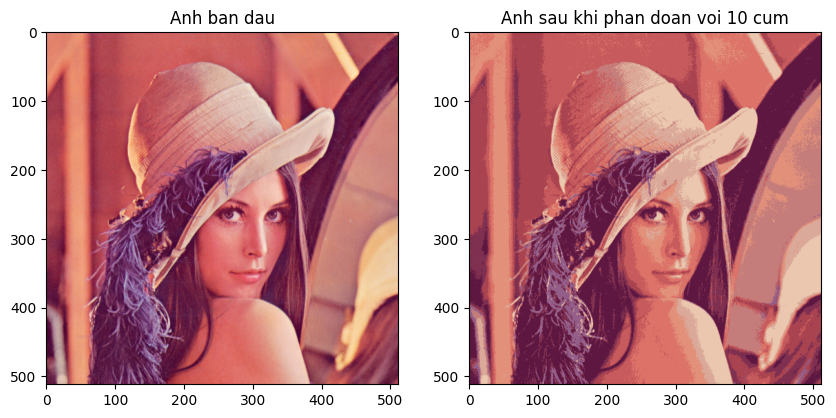

In [34]:
# Đây là phương pháp khởi tạo ngẫu nhiên
 
# Chọn số lượng cụm (clusters)
K = 10
kmeans = KMeans(n_clusters=K, init='random', random_state=0)

# Áp dụng K-means clustering cho giá trị các pixel
kmeans.fit(pixel_values)

# Thay thế giá trị mỗi pixel bằng giá trị trung tâm của cụm tương ứng
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Chuyển hình ảnh đã phân đoạn trở lại unit8
segmented_image = np.uint8(segmented_image)

# Hiện thị ảnh ban đầu và ảnh sau khi phân đoạn để so sánh
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Anh ban dau')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Anh sau khi phan doan voi {K} cum')

plt.show()


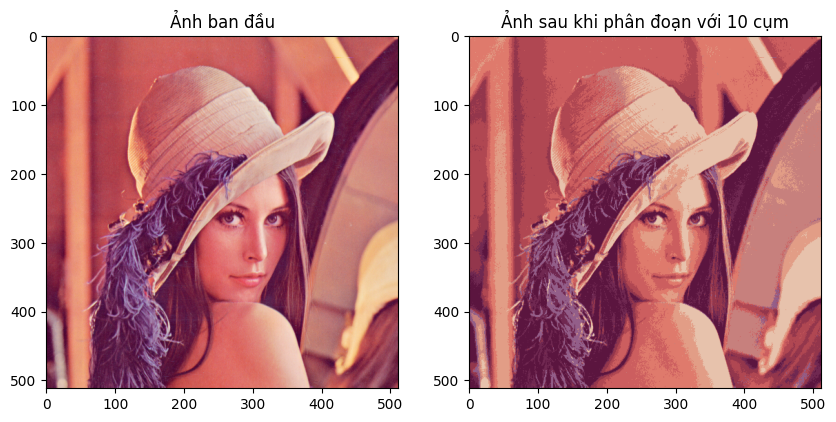

In [35]:
# Đây là phương pháp khởi tạo mặc định (k-mean++)

# Chọn số lượng cụm (clusters)
K = 10
kmeans = KMeans(n_clusters=K, random_state=0)

# Áp dụng K-means clustering cho giá trị các pixel
kmeans.fit(pixel_values)

# Thay thế giá trị mỗi pixel bằng giá trị trung tâm của cụm tương ứng
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Chuyển hình ảnh đã phân đoạn trở lại unit8
segmented_image = np.uint8(segmented_image)

# Hiện thị ảnh ban đầu và ảnh sau khi phân đoạn để so sánh
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Ảnh ban đầu')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Ảnh sau khi phân đoạn với {K} cụm')

plt.show()


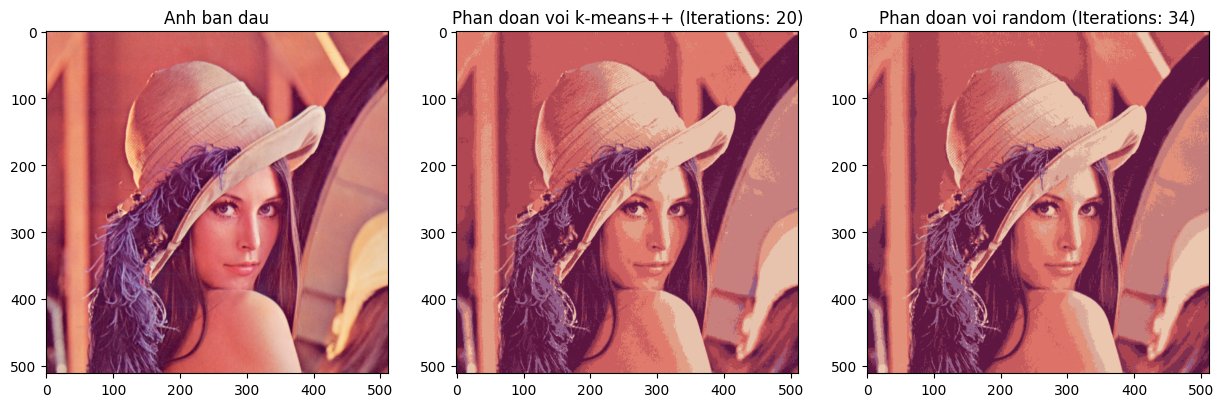

So lan lap voi k-means++: 20
So lan lap voi random: 34


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load file hình ảnh (ví dụ: file ảnh 'lenna.png' chứa cùng chung trong thư mục)
image = cv2.imread('lenna.png')
# Chuyển từ BGR (OpenCV) sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Định dạng ảnh thành một mảng 2D chứa các pixel (width * height, 3)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Chọn số lượng cụm (clusters)
K = 10

# Thử nghiệm với khởi tạo 'k-means++'
kmeans_plus = KMeans(n_clusters=K, init='k-means++', random_state=0)
kmeans_plus.fit(pixel_values)
segmented_image_plus = kmeans_plus.cluster_centers_[kmeans_plus.labels_]
segmented_image_plus = segmented_image_plus.reshape(image.shape)
segmented_image_plus = np.uint8(segmented_image_plus)

# Thử nghiệm với khởi tạo 'random'
kmeans_random = KMeans(n_clusters=K, init='random', random_state=0)
kmeans_random.fit(pixel_values)
segmented_image_random = kmeans_random.cluster_centers_[kmeans_random.labels_]
segmented_image_random = segmented_image_random.reshape(image.shape)
segmented_image_random = np.uint8(segmented_image_random)

# Hiện thị ảnh ban đầu, ảnh phân đoạn với 'k-means++' và 'random'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Anh ban dau')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image_plus)
plt.title(f'Phan doan voi k-means++ (Iterations: {kmeans_plus.n_iter_})')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image_random)
plt.title(f'Phan doan voi random (Iterations: {kmeans_random.n_iter_})')

plt.show()

# Hiển thị số lần lặp cho từng phương pháp
print(f"So lan lap voi k-means++: {kmeans_plus.n_iter_}")
print(f"So lan lap voi random: {kmeans_random.n_iter_}")


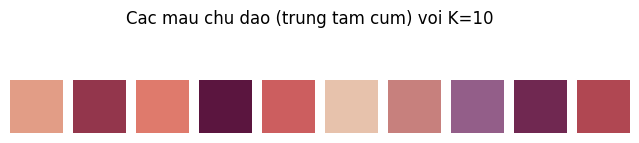

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load file hình ảnh (ví dụ: file ảnh 'lenna.png' chứa cùng chung trong thư mục)
image = cv2.imread('lenna.png')
# Chuyển từ BGR (OpenCV) sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Định dạng ảnh thành một mảng 2D chứa các pixel (width * height, 3)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Chọn số lượng cụm (clusters)
K = 10

# Thực hiện phân cụm k-means với khởi tạo 'k-means++'
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
kmeans.fit(pixel_values)

# Lấy các trung tâm cụm (màu chủ đạo)
centers = kmeans.cluster_centers_
# Chuyển đổi trung tâm cụm sang kiểu uint8 (0-255)
centers = np.uint8(centers)

# Hiển thị các màu chủ đạo (trung tâm cụm)
plt.figure(figsize=(8, 2))
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.imshow([[centers[i]]])
    plt.axis('off')

plt.suptitle(f'Cac mau chu dao (trung tam cum) voi K={K}')
plt.show()
